# E-News Express

## Background

Every company looks for new ways to acquire new viewers, clients, and customers.  There are different ways to reach these goals.  In the case of E-News Express, they are looking to get new subscribers by making changes to their online website. I, a Data Scientist hired by E-News Express, am figuring out which landing page is more effective for E-News Express.  An experiment, known as an A/B test, is conducted on website viewers.  Data collected about the viewers is what is going to be examaned in this project.

## Key Question to Answer

Is the new landing page more appealing to website viewers than the old landing page? In other words, Is the new website more effective in gathering new subscribers?

## Dataset

#### The lines below give a brief definition of each variable in the dataset:

User ID: The identifier assigned to the person visiting the website.

Group: Which group the user is in, whether the first group (control group) or the second group (treatment group).

Landing Page: Which landing page the user received, whether it was the new or old page.

Time Spent on Page: This is the amount of time the user spent on the page, expressed in minutes.

Converted: This represents whether the user was converted to a subscriber or not.

Language Preferred: This tells us which language the user selected when viewing the landing page, whether English, Spanish, or French.


In [1]:
#To help make our code look less cluttered, this removes the warnings that pop up.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the packages for this project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
# Reading our dataset titled "abtest.csv".
file=pd.read_csv("abtest.csv")

# Making a copy of the dataset, so we are not making any changes to the original file.
data=file.copy()

In [4]:
# Viewing the first 5 rows of the dataset
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Viewing the last 5 rows of the dataset
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Looking at the shape of the dataset
data.shape

(100, 6)

#### Observation
Dataset has 100 rows and 6 columns

In [7]:
# Cleaning the data. Looking for any blank entries in the dataset
data=data.dropna()

In [8]:
data.shape

(100, 6)

#### Observation
The command did not remove any entries of the datset.  

In [9]:
# Showing the data types of our variables in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.5+ KB


In [10]:
# We want to change the data type of a few variables.  
data["group"]=data["group"].astype("category")
data["converted"]=data["converted"].astype("category")
data["landing_page"]=data["landing_page"].astype("category")

#### Observations
I changed group, converted, and landing_page to be categories.  Not only does this help with memory usage, but there are limited outcomes for these datatypes, and we want them to be categories.  For example:

Group: can only yield a response of "control" or treatment".

Converted: can only yield a response of "yes" or "no".

Landing_page: can only yield a response of "old" or "new".

In [11]:
# Checking the data types after the change
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    object  
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 3.7+ KB


#### Observation
We can see that the aformentioned variables are now category datatypes.  The rest will remain as integers.

In [12]:
# Getting some useful figures in regards to time spent on the page
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observation

The mean time spent on the page is less than the median, indicating a left skew.

The biggest takeaway from this that I will test involves the mean time spent on the page (5.37 seconds)

In [13]:
# For the sake of simplifying our tests and EDA, I defined variables for each group
treatment = data[data['group']=='treatment']
control = data[data['group']=='control']

# I did the same for languages
english = data[data['language_preferred']=='English']
spanish = data[data['language_preferred']=='Spanish']
french = data[data['language_preferred']=='French']

# I am assigning the separate groups' languages to their own variables for better visuals (such as subplots) later on
oldenglish = control[control['language_preferred']=='English']
oldspanish = control[control['language_preferred']=='Spanish']
oldfrench = control[control['language_preferred']=='French']
newenglish = treatment[treatment['language_preferred']=='English']
newspanish = treatment[treatment['language_preferred']=='Spanish']
newfrench = treatment[treatment['language_preferred']=='French']

## EDA

In [14]:
# Defining a function to give us the percentage of each language preferred in the sample
def percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()          
        ax.annotate(percentage, (x, y), size = 12)  
    plt.show()

### Percentages of Language Preferred for the Sample

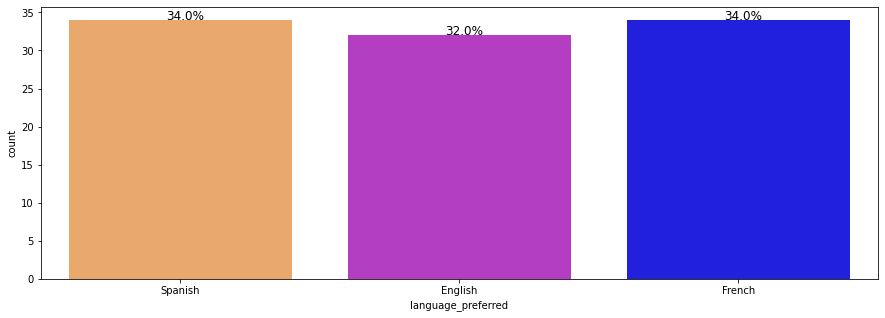

In [15]:
# Using a countplot to determine the frequency of each language preferred
plt.figure(figsize=(15,5))
ax = sns.countplot(data["language_preferred"], palette="gnuplot2_r")
percent(ax,data["language_preferred"])

#### Observation

There appears to be an pretty even dispersion on language preferred by the users going on the site.  This is good.

### Percentages of Converted for the Two Groups

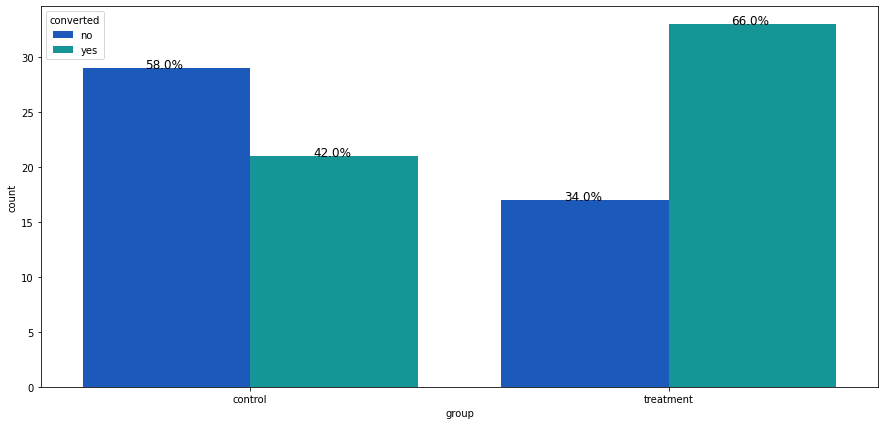

In [16]:
# Using a countplot to show us the proportions in percentage form of conversion for each group
plt.figure(figsize=(15,7))
ax = sns.countplot(data["group"], hue=data["converted"], palette="winter")
percent(ax,control["group"])

#### Observation

By looking at this visual alone, we see a nice improvement in conversion with the treatment group from the control group.


#### Control group:

58% did not convert

42% converted

#### Treatment group:

34% did not convert

66% converted

### Multivariate Analysis

<Figure size 1080x504 with 0 Axes>

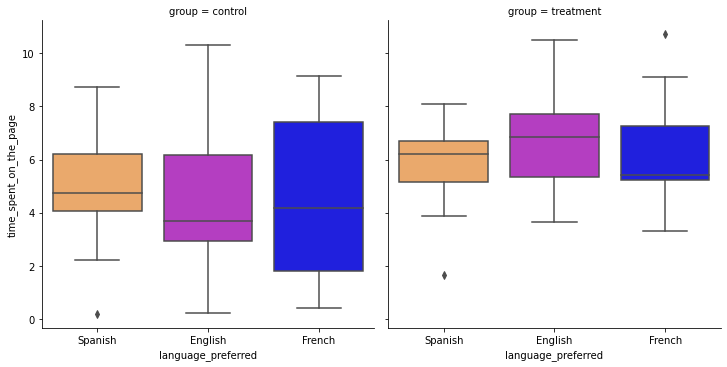

In [17]:
plt.figure(figsize=(15,7))
sns.catplot(x="language_preferred", y = "time_spent_on_the_page", col = "group", data=data, kind="box", palette="gnuplot2_r")

<Figure size 1080x504 with 0 Axes>

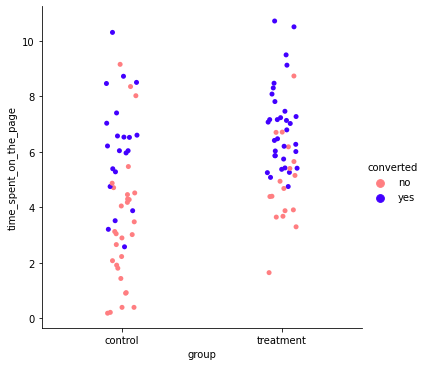

In [18]:
# Bivariate distribution to show the relationship between two variables.  I am using the cat plot for this
plt.figure(figsize=(15,7))
sns.catplot(x="group", y="time_spent_on_the_page", hue="converted", data=data, palette="gnuplot2_r")

In [19]:
data.groupby('group')['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

#### Observations
The average time spent on the page is higher amongst the treatment group

Regardless of which page the user receives, it appears that the longer they stay on the landing page, the more likely they are to convert to a subscriber.

We can also see here that the time spent on the new landing page (treatment group) is, on average, higher across all languages.

In [20]:
# Does the mean time spent on the page vary based on language preferred?
data.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

#### Observation
The average time spent on the page is quite similar across all languages when combining groups.

## Hypothesis Testing

### Time Spent on the Landing Page and Preferred Language

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

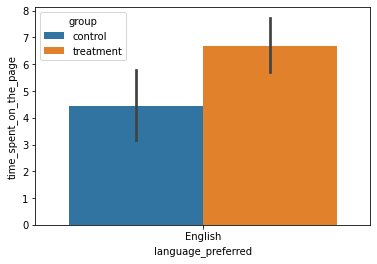

In [21]:
sns.barplot(english['language_preferred'],english['time_spent_on_the_page'], hue=english['group'])

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

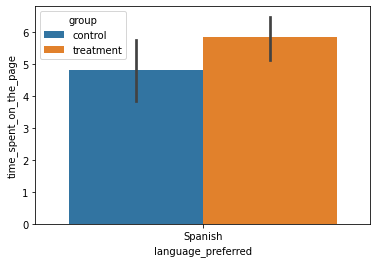

In [22]:
sns.barplot(spanish['language_preferred'],spanish['time_spent_on_the_page'], hue=spanish['group'])

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

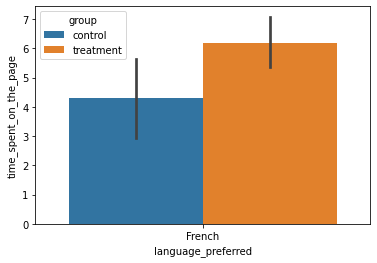

In [23]:
sns.barplot(french['language_preferred'],french['time_spent_on_the_page'], hue=french['group'])

In [24]:
print(english.groupby("group")['time_spent_on_the_page'].mean())
print(spanish.groupby("group")['time_spent_on_the_page'].mean())
print(french.groupby("group")['time_spent_on_the_page'].mean())

group
control      4.454375
treatment    6.663750
Name: time_spent_on_the_page, dtype: float64
group
control      4.828235
treatment    5.835294
Name: time_spent_on_the_page, dtype: float64
group
control      4.310000
treatment    6.196471
Name: time_spent_on_the_page, dtype: float64


### Shapiro-Wilk's Test

Null hypothesis 

$H_0:$ They follow a normal distribution.

Alternative hypothesis 

$H_a:$ They do not follow a normal distribution.

In [25]:
# Shapiro-Wilk's Test
# Importing the function
from scipy import stats

# finding the p-value
w, p_value = stats.shapiro(data['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


#### Observation

Since th p-value is quite large, we fail to reject the null hypothesis.

### Levene's Test
Null hypothesis

$H_0$: All of the variances are equal.

Alternative hypothesis

$H_a$: At least one variance is not equal.

In [26]:
# Levene's Test
# Importing the function
from scipy.stats import levene
statistic, p_value = levene( data['time_spent_on_the_page'][data['language_preferred']=="English"], 
                                   data['time_spent_on_the_page'][data['language_preferred']=="Spanish"], 
                                   data['time_spent_on_the_page'][data['language_preferred']=="French"])
# find the p-value
print(p_value)

0.06515086840327314


#### Observation

Since the p-value is above the 0.05 level, we fail to reject the null that all variances are equal.

### ANOVA Test

Considering that that they are normally distributed and the variances are equal, we can continue with the ANOVA Test.

Null hypothesis is that the means are the same

$𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

Alternative hypothesis is that the means are not the same

$𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [27]:
# ANOVA Test
# Importing the function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Multiple Pairwise Conversion Test
m_comp = pairwise_tukeyhsd(endog = data['time_spent_on_the_page'], groups = data['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


#### Observation

The p-values in column p-adj are all substantially above the 0.05 value.  Because of this, we fail to reject the null hypothesis.

It appears that overall, the new landing page keeps all viewers on longer across all languages on average.

It appears that French is most likely to have lower time spent on page.  Also, there appears to be less converted.  These results seem to be correlated based on this plot and the previous plots.

Longer time spent on the page indicates a stronger conversion rate.  

### Time Spent on the Landing Page And Conversion Rate
We are testing to see if the new landing page is affective at getting new customers. We will test if the time spent on the page has changed based on which page the user has received.

In [28]:
# First, let's find the mean of the control and treatment groups
data.groupby('group')['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

In [29]:
# Second, let's find the standard deviation of the control and treatment groups
data.groupby('group')['time_spent_on_the_page'].std()

group
control      2.581975
treatment    1.817031
Name: time_spent_on_the_page, dtype: float64

#### Observation

The standard deviations are NOT equal which means their variances are not equal.  We need to take this into account when doing our hypothesis test.

### T-Test for Equality of Means (When Standard Deviation is Known)
The null hypothesis is that the mean wait time is equal with the new landing page.

$H_0:\mu_1=\mu_2$
    
The alternative hypothesis is that the mean wait time HAS increased with the new landing page.

$H_a:\mu_1>\mu_2$


We assume the following:

-The sample is random.

-The distribution is normally distributed.

-The data is continuous.

-The populations are two different groups.

Considering we know the standard deviation, we will use a t-test.  We use a t-test over a z-test because we do not know the population values.

In [30]:
#import the t-test function from scipy
from scipy.stats import ttest_ind

# I used "greater" because this is a one sided test.  We are trying to see if the time spent has increased.
test_stat, p_value = ttest_ind(treatment['time_spent_on_the_page'], control['time_spent_on_the_page'].dropna(), equal_var = False, alternative="greater")
print(p_value)

0.0001392381225166549


#### Observation

The p-value is significantly below the significance level of 0.05.  Considering it is less than the level of significance, we reject the null hypothesis.

Users spend more time on the new landing page.

### Two Proportion Test for Conversion Rate and the Landing Page
The null hypothesis is that the new landing page has NOT made an impact on conversion.

$H_0:p_1 =p_2$
    
The alternative hypothesis is that the new landing page has made an impact on conversion.

$H_a:p_1 \neq p_2$



#### Considering these values are percentages, I will use a two proportion z-test

On the old landing page, 21 converted out of 50. 29 DIDN'T convert.

On the new landing page, 33 converted out of 50. 17 DIDN'T convert.

In [31]:
# Importing the function
from statsmodels.stats.proportion import proportions_ztest

# Setting the number that didn't convert
nonconvert = np.array([29, 17])

# Setting the sample size of the two groups
samples = np.array([50, 50])

# Finding the p-value for our conversion rates
test_stat, p_value = proportions_ztest(nonconvert, samples)
print(p_value)

0.016052616408112598


#### Observation

The p-value is significantly below the significance level of 0.05.  Considering it is less than the level of significance, we reject the null hypothesis.

The conversion rate of the new landing page is greater than the conversion rate of the old landing page.

## Language Preferred and Conversion

In [32]:
#First, I will count the amounts of each language for the two groups
print("For the control group: \n", control.groupby('language_preferred')['converted'].count())
print("\n")
print("For the treatment group: \n", treatment.groupby('language_preferred')['converted'].count())

For the control group: 
 language_preferred
English    16
French     17
Spanish    17
Name: converted, dtype: int64


For the treatment group: 
 language_preferred
English    16
French     17
Spanish    17
Name: converted, dtype: int64


#### Observation
It looks like the ratios are exactly even for each group in regards to the count.

### English and Conversion Rate

In [33]:
print(oldenglish.groupby('converted')['group'].count())
print("\n")
print(newenglish.groupby('converted')['group'].count())

converted
no      5
yes    11
Name: group, dtype: int64


converted
no      6
yes    10
Name: group, dtype: int64


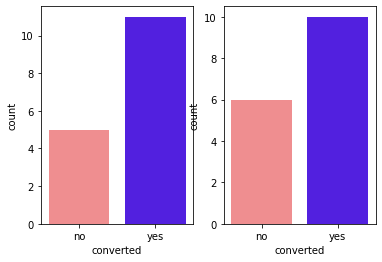

In [34]:
fig, ax =plt.subplots(1,2)
sns.countplot(oldenglish["converted"], palette="gnuplot2_r", ax=ax[0])
sns.countplot(newenglish["converted"], palette="gnuplot2_r", ax=ax[1])
fig.show()

#### Observation

When looking at the counts, English as language preferred seems to convert well across both pages.

### Spanish and Conversion Rate

In [35]:
print(oldspanish.groupby('converted')['group'].count())
print("\n")
print(newspanish.groupby('converted')['group'].count())

converted
no     10
yes     7
Name: group, dtype: int64


converted
no      6
yes    11
Name: group, dtype: int64


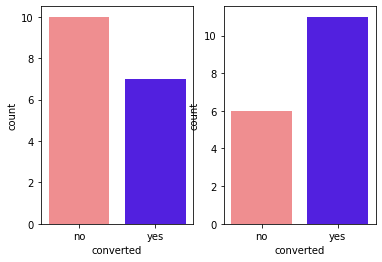

In [36]:
fig, ax =plt.subplots(1,2)
sns.countplot(oldspanish["converted"], palette="gnuplot2_r", ax=ax[0])
sns.countplot(newspanish["converted"], palette="gnuplot2_r", ax=ax[1])
fig.show()

#### Observation

Spanish as language preferred are more likely to convert on the new landing page.

The new website make a tremendous impact when it comes to converting the Spanish audience.

### French and Conversion Rate

In [37]:
print(oldfrench.groupby('converted')['group'].count())
print("\n")
print(newfrench.groupby('converted')['group'].count())

converted
no     14
yes     3
Name: group, dtype: int64


converted
no      5
yes    12
Name: group, dtype: int64


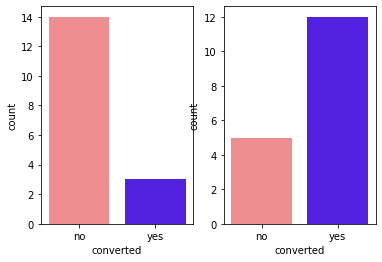

In [38]:
fig, ax =plt.subplots(1,2)
sns.countplot(oldfrench["converted"], palette="gnuplot2_r", ax=ax[0])
sns.countplot(newfrench["converted"], palette="gnuplot2_r", ax=ax[1])
fig.show()

### Chi-Square Test for Independence

Null hypothesis

$H_0:$ Conversion is independent of Language Preferred

Alternate hypothesis

$H_a:$ Conversion depends on Language Preferred

In [51]:
# Making a table for our variables
languageconvert=pd.crosstab(index=data["converted"], columns=data["language_preferred"])
languageconvert

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [52]:
# Importing the function
from scipy.stats import chi2_contingency

# Finding our p-value
chi, p_value, dof, expected = chi2_contingency(languageconvert)
print(p_value)

0.21298887487543447


#### Observation
Considering the p-value is above the level of significance, we fail to reject the null hypothesis 

In [39]:
print("The conversion rate for Old site's English viewers is:", round((11/16)*100),"%")
print("The conversion rate for New site's English viewers is:", round((10/16)*100),"%")
print("The conversion rate for Old site's Spanish viewers is:", round((7/17)*100),"%")
print("The conversion rate for New site's Spanish viewers is:", round((11/17)*100),"%")
print("The conversion rate for Old site's French viewers is:", round((3/17)*100),"%")
print("The conversion rate for New site's French viewers is:", round((12/17)*100),"%")

The conversion rate for Old site's English viewers is: 69 %
The conversion rate for New site's English viewers is: 62 %
The conversion rate for Old site's Spanish viewers is: 41 %
The conversion rate for New site's Spanish viewers is: 65 %
The conversion rate for Old site's French viewers is: 18 %
The conversion rate for New site's French viewers is: 71 %


#### Observation

When looking at language, it appears that the new site has similar conversion for English, and substantially BETTER conversion for Spanish and French.


## Conclusion and Recommendations

It appears that people who spend more time on the landing page will convert at a higher rate.  I advise E-News express to not only keep the new landing page, but look for other methods to keep the user on the landing page.  There is statistical significance showing that the longer they are kept on the page, they are more likely to convert.  E-News could look at other methods to improve the landing page further.

For example: They could implement better visuals to engage the viewer.  They want to have captivating captions, and they want to do everything that does not bore the viewer.  By having colors that are not hard on the eyes, appeasing fonts, and other methods, E-News could go even further at captivating the audience.

They could implement polls, chatboxs, comment sections, and other widgets to keep the reader occupied (If they haven't already).